## Data Import


In [207]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,building_id,timestamp,meter_reading,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,1,2016-01-01 00:00:00,0.0,Education,2720,2004,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,2,2016-01-01 00:00:00,0.0,Education,5376,1991,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,3,2016-01-01 00:00:00,0.0,Education,23685,2002,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,4,2016-01-01 00:00:00,0.0,Education,116607,1975,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,5,2016-01-01 00:00:00,0.0,Education,8000,2000,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [208]:
train.describe().round(2)

,building_id,meter_reading,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,698675.00,698675.00,698675.00,698675.00,698452.00,394159.00,698452.00,698591.00,691953.00,678753.00,698675.00
mean,50.06,231.26,88803.21,1995.64,22.84,3.04,16.82,1.37,1017.99,156.44,3.38
std,29.35,382.40,109440.85,14.38,6.03,2.12,6.51,12.87,4.04,118.37,2.16
min,0.00,0.00,283.00,1968.00,1.70,0.00,-9.40,-1.00,992.00,0.00,0.00
25%,24.00,0.00,24456.00,1985.00,18.90,2.00,13.30,0.00,1015.50,60.00,2.10
50%,50.00,71.26,53130.00,2001.00,23.90,2.00,18.30,0.00,1018.00,140.00,3.10
75%,76.00,302.71,103286.00,2007.00,26.70,4.00,22.20,0.00,1020.60,260.00,4.60
max,100.00,4521.00,487433.00,2016.00,36.10,9.00,25.60,343.00,1030.20,360.00,15.40


In [209]:
test.describe().round(2)

,building_id,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,174666.00,174666.00,174666.00,174592.00,98488.00,174592.00,174651.00,172956.00,169751.00,174666.00
mean,50.27,88930.24,1995.61,22.84,3.05,16.82,1.43,1018.00,156.58,3.37
std,29.32,109500.29,14.41,6.04,2.11,6.53,13.29,4.03,118.39,2.15
min,0.00,283.00,1968.00,1.70,0.00,-9.40,-1.00,992.00,0.00,0.00
25%,25.00,24456.00,1985.00,18.90,2.00,13.30,0.00,1015.50,60.00,2.10
50%,50.00,53130.00,2001.00,23.90,2.00,18.30,0.00,1018.00,140.00,3.10
75%,76.00,103286.00,2007.00,26.70,4.00,22.20,0.00,1020.60,260.00,4.60
max,100.00,487433.00,2016.00,36.10,9.00,25.60,343.00,1030.20,360.00,15.40


## Data Cleaning


In [210]:
train.shape

(698675, 13)

In [211]:
train.dtypes

building_id             int64
timestamp              object
meter_reading         float64
primary_use            object
square_feet             int64
year_built              int64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

In [212]:
print(train.duplicated().sum())
print(train['timestamp'].duplicated().sum())
print(train['building_id'].duplicated().sum())

0
689891
698574


In [213]:
train.isna().sum()

building_id                0
timestamp                  0
meter_reading              0
primary_use                0
square_feet                0
year_built                 0
air_temperature          223
cloud_coverage        304516
dew_temperature          223
precip_depth_1_hr         84
sea_level_pressure      6722
wind_direction         19922
wind_speed                 0
dtype: int64

In [214]:
train.columns

Index(['building_id', 'timestamp', 'meter_reading', 'primary_use',
       'square_feet', 'year_built', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

In [215]:
columns_with_na = [
    'air_temperature', 'cloud_coverage', 'dew_temperature',
    'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction']
for column in columns_with_na:
    train[column] = train[column].fillna(train[column].mean())

train.isna().sum()

building_id           0
timestamp             0
meter_reading         0
primary_use           0
square_feet           0
year_built            0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

In [216]:
timestamp = pd.to_datetime(train['timestamp']).dt
train['month'] = timestamp.month
train['day'] = timestamp.day
train['weekday'] = timestamp.dayofweek
train['hour'] = timestamp.hour

## Data Exploration


In [217]:
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from cycler import cycler

palette = ['#5c8ad6', '#68ce7f', '#ea5d62', '#9c8ad9', '#f2db89']
rcParams['axes.prop_cycle'] = cycler(color=palette)
sns.set_style('darkgrid')
sns.set_palette(palette)

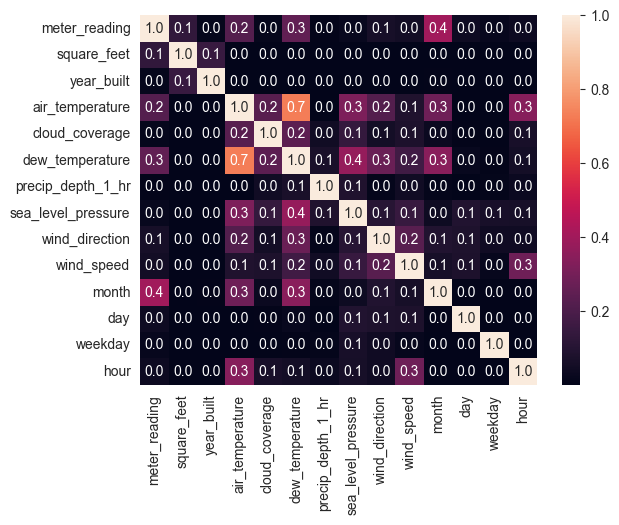

In [218]:
df = train.drop(columns=['building_id', 'primary_use', 'timestamp'])
sns.heatmap(df.corr().abs(), annot=True, fmt='.1f') and plt.show()

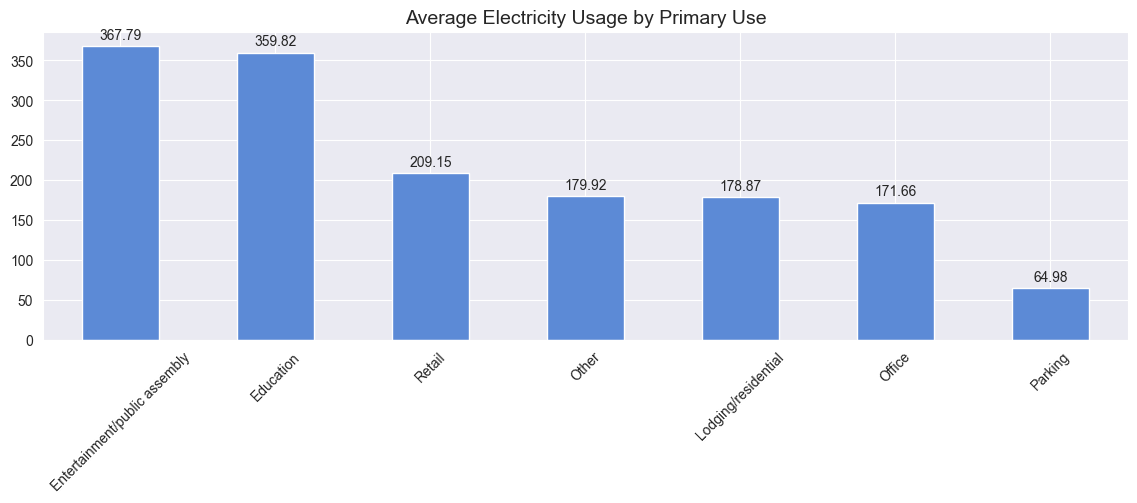

In [219]:
values = train.groupby('primary_use')['meter_reading'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(14, 4))
values.plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('')
plt.title('Average Electricity Usage by Primary Use', fontsize=14)
for rect, label in zip(plt.gca().patches, values): ax.text(
    rect.get_x() + rect.get_width() / 2, rect.get_height() + 5,
    "{:,.2f}".format(label), ha='center', va='bottom')

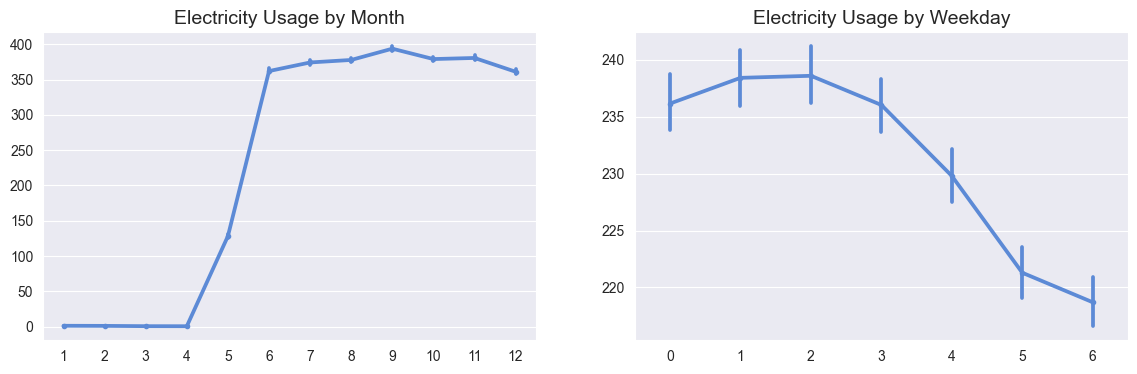

In [220]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

for i, key in enumerate(['month', 'weekday']):
    df = train[['meter_reading', key]]
    sns.pointplot(x=key, y='meter_reading', data=df, ms=2, ax=axs[i])
    axs[i].set_title('Electricity Usage by ' + key.capitalize(), fontsize=14)
    axs[i].set_xlabel('') and axs[i].set_ylabel('')

plt.show()

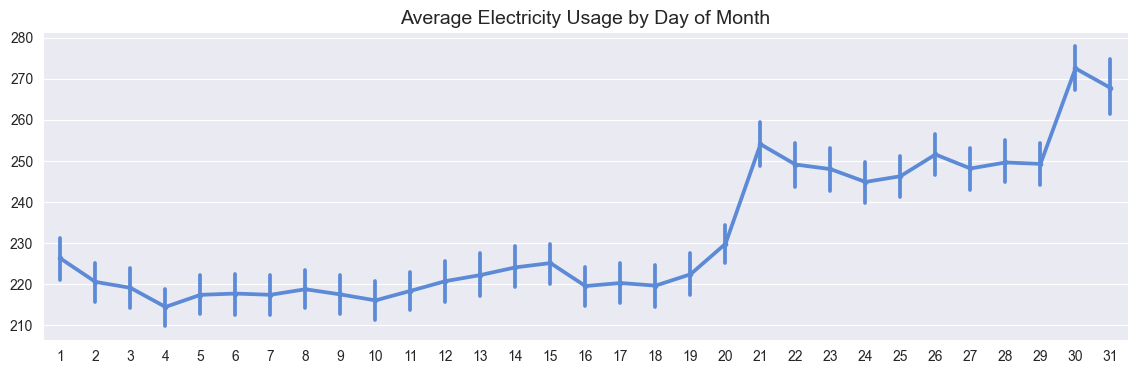

In [221]:
plt.figure(figsize=(14, 4))
sns.pointplot(x='day', y='meter_reading', data=train, ms=2)
plt.title('Average Electricity Usage by Day of Month', fontsize=14)
plt.xlabel('') and plt.ylabel('') and plt.show()

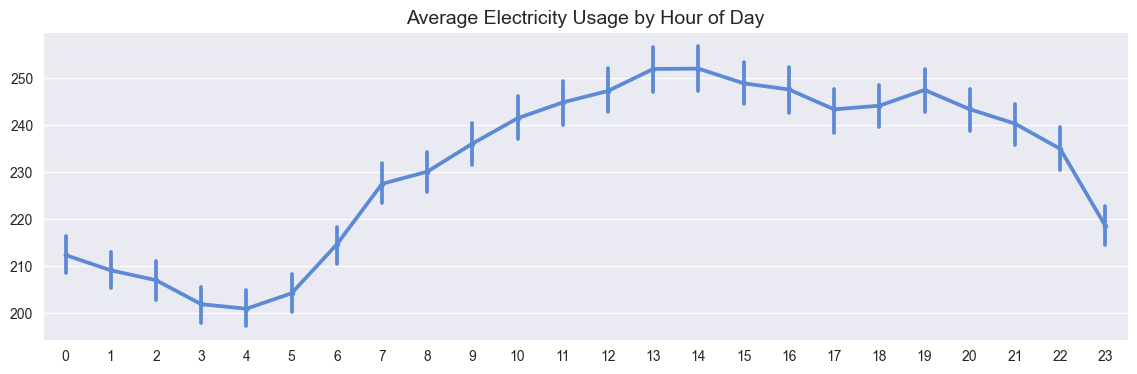

In [222]:
plt.figure(figsize=(14, 4))
sns.pointplot(x='hour', y='meter_reading', data=train, ms=2)
plt.title('Average Electricity Usage by Hour of Day', fontsize=14)
plt.xlabel('') and plt.ylabel('') and plt.show()

In [223]:
df = pd.read_csv('weather_train.csv')

timestamp = pd.to_datetime(df['timestamp']).dt
df['month'] = timestamp.month
df['day'] = timestamp.day
df['weekday'] = timestamp.dayofweek
df['hour'] = timestamp.hour

df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,day,weekday,hour
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,1,1,4,1
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,1,1,4,2
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,1,1,4,3
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,1,1,4,4


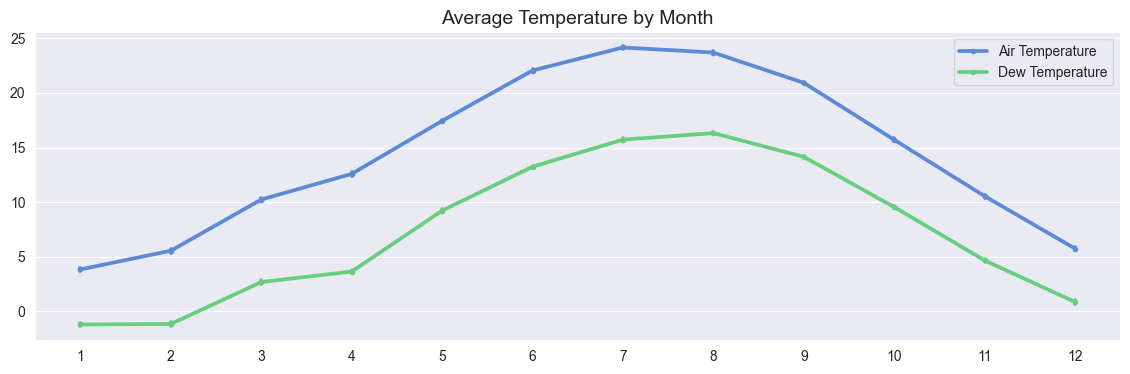

In [224]:
plt.figure(figsize=(14, 4))
t = 'Temperature'
sns.pointplot(x='month', y='air_temperature', data=df, ms=2, label='Air ' + t)
sns.pointplot(x='month', y='dew_temperature', data=df, ms=2, label='Dew ' + t)
plt.title(f'Average {t} by Month', fontsize=14)
plt.xlabel('') and plt.ylabel('') and plt.show()

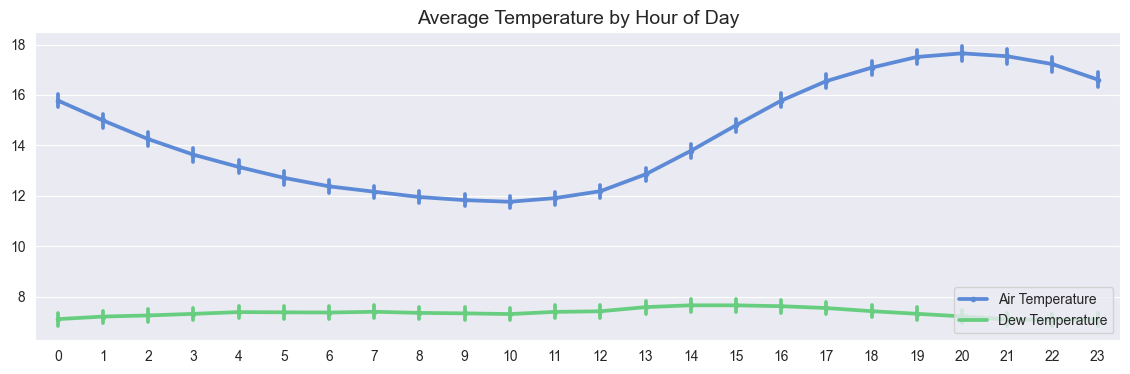

In [225]:
plt.figure(figsize=(14, 4))
sns.pointplot(x='hour', y='air_temperature', data=df, ms=2)
sns.pointplot(x='hour', y='dew_temperature', data=df, ms=2)
plt.title('Average Temperature by Hour of Day', fontsize=14)
plt.legend(loc='lower right', labels=['Air Temperature', 'Dew Temperature'])
plt.gca().get_legend().legend_handles[0].set_color(palette[0])
plt.gca().get_legend().legend_handles[1].set_color(palette[1])
plt.xlabel('') and plt.ylabel('') and plt.show()

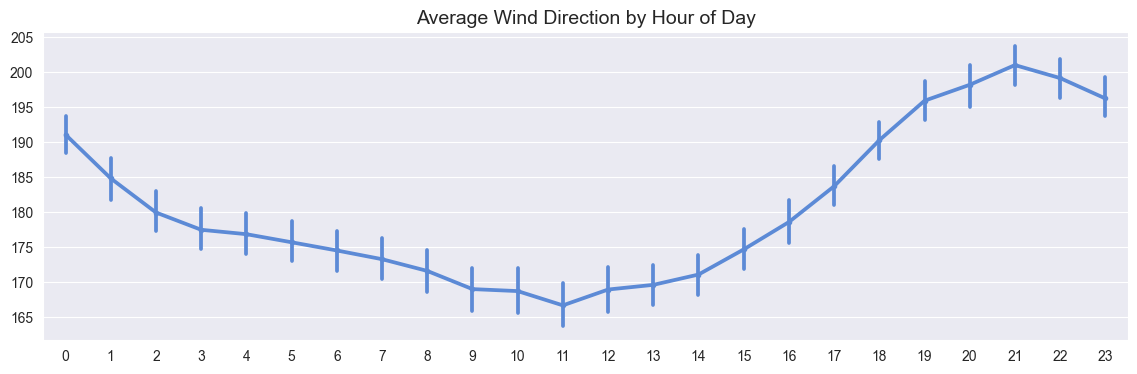

In [226]:
plt.figure(figsize=(14, 4))
sns.pointplot(x='hour', y='wind_direction', data=df, ms=2)
plt.title('Average Wind Direction by Hour of Day', fontsize=14)
plt.xlabel('') and plt.ylabel('') and plt.show()

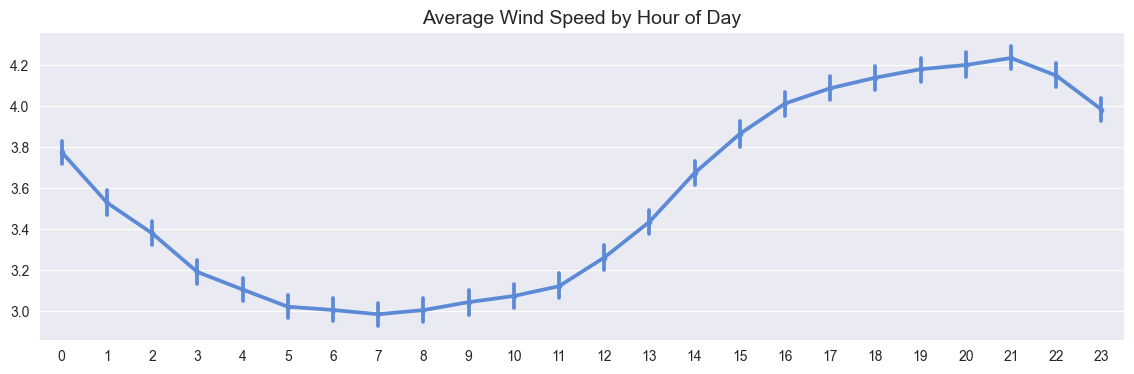

In [227]:
plt.figure(figsize=(14, 4))
sns.pointplot(x='hour', y='wind_speed', data=df, markersize=2)
plt.title('Average Wind Speed by Hour of Day', fontsize=14)
plt.xlabel('') and plt.ylabel('') and plt.show()

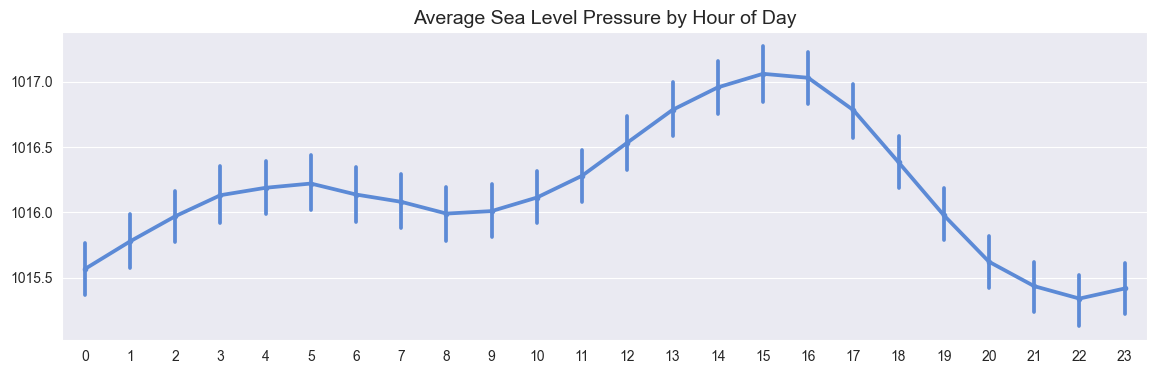

In [228]:
plt.figure(figsize=(14, 4))
sns.pointplot(x='hour', y='sea_level_pressure', data=df, markersize=2)
plt.title('Average Sea Level Pressure by Hour of Day', fontsize=14)
plt.xlabel('') and plt.ylabel('') and plt.show()

## Data Analysis


In [229]:
train.columns

Index(['building_id', 'timestamp', 'meter_reading', 'primary_use',
       'square_feet', 'year_built', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'month', 'day', 'weekday', 'hour'],
      dtype='object')

In [230]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
train['primary_use'] = le.fit_transform(train['primary_use'])

x = train.drop(columns=['meter_reading', 'timestamp'])
y = train['meter_reading']

x_train, x_valid, y_train, y_valid = train_test_split(
    x, y, test_size=.2, random_state=0)

In [231]:
# from sklearn.metrics import r2_score, mean_squared_error
# import joblib

# models_best = pd.DataFrame(columns=['Model', 'R2', 'RMSE'])

# def runModel(model, name):
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_valid)
#     models_best.loc[name] = {
#         'Model': model,
#         'R2': r2_score(y_valid, y_pred),
#         'RMSE': mean_squared_error(y_valid, y_pred, squared=False)
#     }

# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor

# models = [
#     LinearRegression(),
#     Lasso(),
#     Ridge(),
#     ElasticNet(),
#     DecisionTreeRegressor(random_state=0),
#     RandomForestRegressor(random_state=0),
#     GradientBoostingRegressor(random_state=0),
#     MLPRegressor(random_state=0),
#     XGBRegressor(random_state=0)
# ]

# for model in models: runModel(model, model.__class__.__name__)

# for model in models:
#     joblib.dump(model, model.__class__.__name__ + '.pkl')

# models_best.drop(columns='Model').sort_values('R2', ascending=False)

In [232]:
import joblib
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(random_state=0),
    GradientBoostingRegressor(random_state=0),
    MLPRegressor(random_state=0),
    XGBRegressor(random_state=0)
]

models = [
    joblib.load('Model_' + model.__class__.__name__ + '.pkl')
    for model in models]

models_best = pd.DataFrame(columns=['Model', 'R2', 'RMSE'])

def runModel(model, name):
    y_pred = model.predict(x_valid)
    models_best.loc[name] = {
        'Model': model,
        'R2': r2_score(y_valid, y_pred),
        'RMSE': mean_squared_error(y_valid, y_pred, squared=False)
    }

for model in models: runModel(model, model.__class__.__name__)

models_best.drop(columns='Model').sort_values('R2', ascending=False)

,R2,RMSE
RandomForestRegressor,0.993209,31.495881
DecisionTreeRegressor,0.987920,42.006312
XGBRegressor,0.978843,55.592083
GradientBoostingRegressor,0.863975,140.958874
MLPRegressor,0.677968,216.886925
LinearRegression,0.269413,326.677986
Ridge,0.269413,326.677986
Lasso,0.269385,326.684255
ElasticNet,0.267467,327.112605


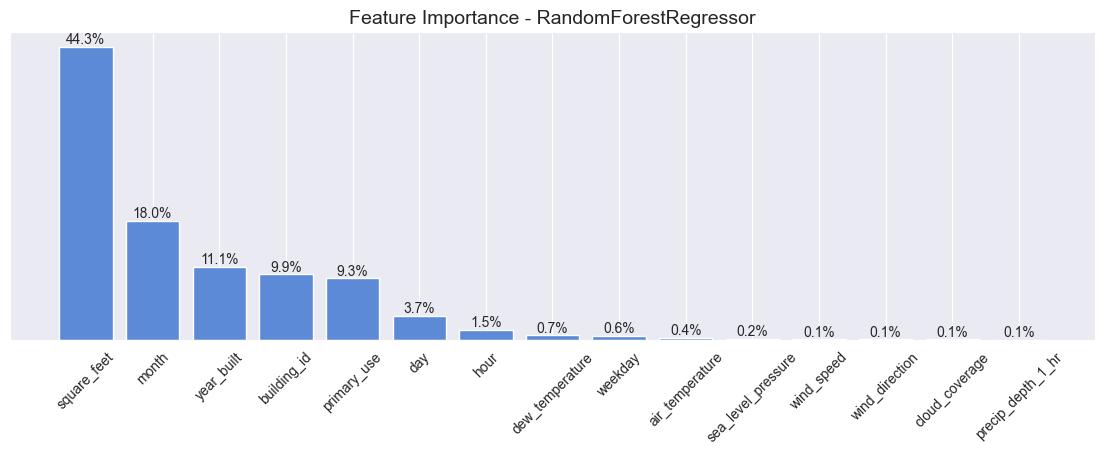

In [233]:
model_rf = models_best.loc['RandomForestRegressor', 'Model']
importances = model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(14, 4))
plt.bar(x.columns[indices], importances[indices])
plt.xticks(rotation=45)
plt.gca().axes.get_yaxis().set_visible(False)
for i, value in enumerate(importances[indices]):
    plt.text(i, value, '{:.1%}'.format(value), ha='center', va='bottom')
plt.title('Feature Importance - RandomForestRegressor', fontsize=14)
plt.show()

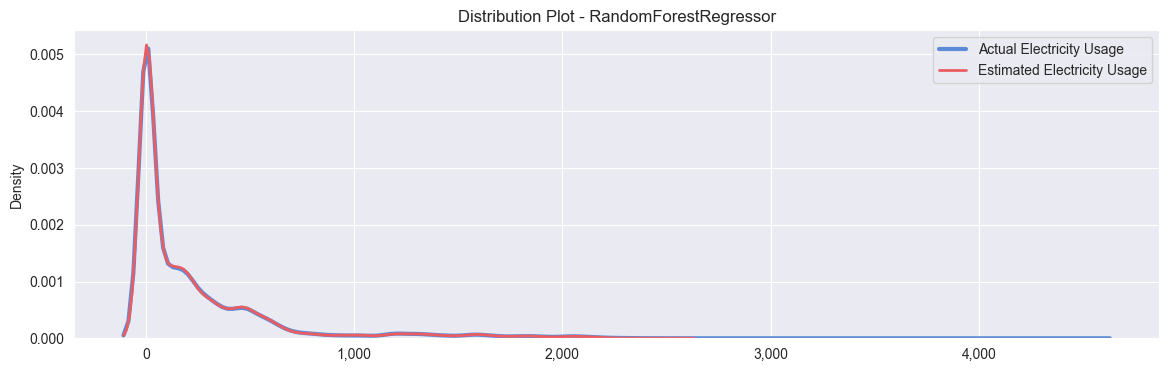

In [234]:
y_pred = model_rf.predict(x_valid)

plt.figure(figsize=(14, 4))
sns.kdeplot(y_valid, lw=3, label='Actual Electricity Usage')
sns.kdeplot(y_pred, lw=2, c=palette[2], label='Estimated Electricity Usage')
plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: "{:,}".format(int(x))))
plt.title('Distribution Plot - ' + model_rf.__class__.__name__)
plt.xlabel('') and plt.legend() and plt.show()

## Forecast


In [235]:
# model_rf.fit(x, y)
# joblib.dump(model, 'Model_' + model.__class__.__name__ + '_Whole.pkl')

In [236]:
model_rf = joblib.load('Model_RandomForestRegressor_Whole.pkl')

In [237]:
test = pd.read_csv('test.csv')
test.describe()

,building_id,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,174666.000000,174666.000000,174666.000000,174592.000000,98488.000000,174592.000000,174651.000000,172956.000000,169751.000000,174666.000000
mean,50.266354,88930.235255,1995.614201,22.836137,3.046158,16.820264,1.429863,1018.001567,156.576162,3.371478
std,29.318223,109500.285497,14.412880,6.043412,2.112713,6.530160,13.289019,4.032830,118.390046,2.145834
min,0.000000,283.000000,1968.000000,1.700000,0.000000,-9.400000,-1.000000,992.000000,0.000000,0.000000
25%,25.000000,24456.000000,1985.000000,18.900000,2.000000,13.300000,0.000000,1015.500000,60.000000,2.100000
50%,50.000000,53130.000000,2001.000000,23.900000,2.000000,18.300000,0.000000,1018.000000,140.000000,3.100000
75%,76.000000,103286.000000,2007.000000,26.700000,4.000000,22.200000,0.000000,1020.600000,260.000000,4.600000
max,100.000000,487433.000000,2016.000000,36.100000,9.000000,25.600000,343.000000,1030.200000,360.000000,15.400000


In [238]:
test.isna().sum()

building_id               0
timestamp                 0
primary_use               0
square_feet               0
year_built                0
air_temperature          74
cloud_coverage        76178
dew_temperature          74
precip_depth_1_hr        15
sea_level_pressure     1710
wind_direction         4915
wind_speed                0
id                        0
dtype: int64

In [239]:
columns_with_na = [
    'air_temperature', 'cloud_coverage', 'dew_temperature',
    'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction']
for column in columns_with_na:
    test[column] = test[column].fillna(train[column].mean())

test.isna().sum()

building_id           0
timestamp             0
primary_use           0
square_feet           0
year_built            0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
id                    0
dtype: int64

In [240]:
test['primary_use'] = le.transform(test['primary_use'])

In [241]:
timestamp = pd.to_datetime(test['timestamp']).dt
test['month'] = timestamp.month
test['day'] = timestamp.day
test['weekday'] = timestamp.dayofweek
test['hour'] = timestamp.hour
test.drop(columns='timestamp', inplace=True)

In [242]:
y_pred = model_rf.predict(test.drop(columns='id'))
result = pd.DataFrame({'id': test['id'], 'meter_reading': y_pred})
# result.to_csv('result.csv', index=False)